In [1]:
import numpy as np
import pandas as pd

In [ ]:
if hf>=0:
        return 1
    else:
        return 0

In [2]:
def AND(x1,x2):
    b=-0.75
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    hf=np.sum((x*w))+b
    if hf>=0:
        return 1
    else:
        return 0

In [3]:
for data in [(0,0),(1,0),(0,1),(1,1)]:
    print(AND(data[0],data[1]))

0
0
0
1


In [4]:
def NAND(x1,x2):
    b=0.75
    x=np.array([x1,x2])
    w=np.array([-0.5,-0.5])
    hf=np.sum((x*w))+b
    if hf>=0:
        return 1
    else:
        return 0

In [5]:
for data in [(0,0),(1,0),(0,1),(1,1)]:
    print(NAND(data[0],data[1]))

1
1
1
0


In [6]:
def OR(x1,x2):
    b=-0.25
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    hf=np.sum((x*w))+b
    if hf>=0:
        return 1
    else:
        return 0
for data in [(0,0),(1,0),(0,1),(1,1)]:
    print(NAND(data[0],data[1]))

1
1
1
0


In [7]:
# AND, NAND, OR함수 적절하게 호출하여
#return된 값을 통해 XOR결과를 출력하는 함수 구현
# def XOR(x1,x2):
#  구현~~
#  0,1,1,0

In [8]:
def XOR(x1,x2):
    #OR,NAND로 XOR조합하기
    r2=OR(x1,y1)
    r1=NAND(x1,y1)
    return AND(r1,r2)

for data in [(0,0),(1,0),(0,1),(1,1)]:
    print(NAND(data[0],data[1]))

1
1
1
0


In [2]:
import matplotlib.pyplot as plt
def myStep(x):
    return np.array(x>0,dtype=np.int)
x=np.arange(-3,3,0.1)
y=myStep(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

<Figure size 640x480 with 1 Axes>

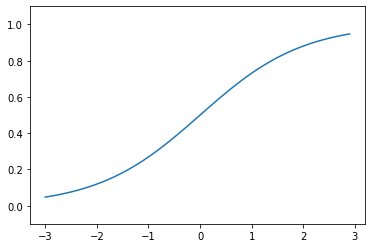

In [10]:

def mySig(x):
    return 1/ (1+np.exp(-x))


x=np.arange(-3,3,0.1)
y=mySig(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()


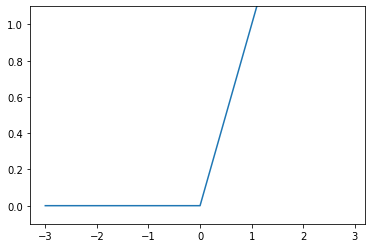

In [13]:

def myRelu(x):
    return np.maximum(0,x)


x=np.arange(-3,3,0.1)
y=myRelu(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

In [12]:
#MLP분류기 기반 타이타닉 데이터 분석

In [3]:
import re
%matplotlib inline

In [4]:
train_df=pd.read_csv("titanictrain.csv",header=0)
test_df=pd.read_csv("titanictest.csv")

In [5]:
full_df=pd.concat([train_df,test_df], ignore_index=True)

C:\Users\ilike\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
train_df=pd.DataFrame()
test_df=pd.DataFrame()

In [7]:
def extract_df():
    tr_df=full_df.loc\
          [full_df['Survived'].notnull()]
    te_df=full_df.loc\
          [full_df['Survived'].isnull()]
    return tr_df,te_df
    
train_df, test_df=extract_df()

In [8]:
full_df['Name']
#호칭 추출: 공백문자 + "알파벳이 한개 이상" + . 

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [12]:
title_sr=full_df.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
#expand가 True이면 DataFrame이 됨, False면 Series가 됨
#호칭 추출
full_df['Title']=title_sr
pd.crosstab(full_df['Title'],full_df['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [13]:
title_sr.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Mme           1
Don           1
Dona          1
Countess      1
Jonkheer      1
Capt          1
Sir           1
Lady          1
Name: Name, dtype: int64

In [16]:
#호칭 단순화
title_list=set(title_sr)
map_title_dic={"Mlle":"Miss","Ms":"Miss","Mme":"Mrs"}
working_dic={}
for key in ['Lady','Countess',
            'Capt','Col','Don',
            'Major','Rev','Sir',
           'Johkheer','Dona']:
    working_dic[key]='Rare'

In [17]:
working_dic

{'Lady': 'Rare',
 'Countess': 'Rare',
 'Capt': 'Rare',
 'Col': 'Rare',
 'Don': 'Rare',
 'Major': 'Rare',
 'Rev': 'Rare',
 'Sir': 'Rare',
 'Johkheer': 'Rare',
 'Dona': 'Rare'}

In [18]:
map_title_dic.update(working_dic) #dictionary가 합쳐졌음! 암기하기

In [19]:
map_title_dic   #호칭을 매핑하기 위한 규칙을 정의하기 위한 dictionary

{'Mlle': 'Miss',
 'Ms': 'Miss',
 'Mme': 'Mrs',
 'Lady': 'Rare',
 'Countess': 'Rare',
 'Capt': 'Rare',
 'Col': 'Rare',
 'Don': 'Rare',
 'Major': 'Rare',
 'Rev': 'Rare',
 'Sir': 'Rare',
 'Johkheer': 'Rare',
 'Dona': 'Rare'}

In [22]:
full_df['Title']=full_df['Title'].replace(map_title_dic)

In [29]:
full_df['Title'].value_counts()

Mr          757
Miss        264
Mrs         198
Master       61
Rare         20
Dr            8
Jonkheer      1
Name: Title, dtype: int64

In [26]:
set(list(full_df['Title']))

{'Dr', 'Jonkheer', 'Master', 'Miss', 'Mr', 'Mrs', 'Rare'}

In [30]:
full_df['Ticket']

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
               ...        
1304             A.5. 3236
1305              PC 17758
1306    SOTON/O.Q. 3101262
1307                359309
1308                  2668
Name: Ticket, Length: 1309, dtype: object

In [40]:
SubCol1=test_df.PassengerId

full_df.drop(['PassengerId','Name','Ticket','Cabin'],
             axis=1,inplace=True)

In [41]:
full_df

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title
0,22.0,S,7.2500,0,3,male,1,0.0,Mr
1,38.0,C,71.2833,0,1,female,1,1.0,Mrs
2,26.0,S,7.9250,0,3,female,0,1.0,Miss
3,35.0,S,53.1000,0,1,female,1,1.0,Mrs
4,35.0,S,8.0500,0,3,male,0,0.0,Mr
...,...,...,...,...,...,...,...,...,...
1304,NaN,S,8.0500,0,3,male,0,NaN,Mr
1305,39.0,C,108.9000,0,1,female,0,NaN,Rare
1306,38.5,S,7.2500,0,3,male,0,NaN,Mr
1307,NaN,S,8.0500,0,3,male,0,NaN,Mr


In [27]:
train_df,test_df=extract_df()

In [37]:
train_df.groupby('Pclass').mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [42]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [45]:
feature_list=list(full_df)

In [49]:
for f in feature_list:
    print(f+" "+str(len(full_df[f].value_counts())))  # 각 column별로 feature의 종류개수

Age 98
Embarked 3
Fare 281
Parch 8
Pclass 3
Sex 2
SibSp 7
Survived 2
Title 7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022FBB309288>,
      dtype=object)

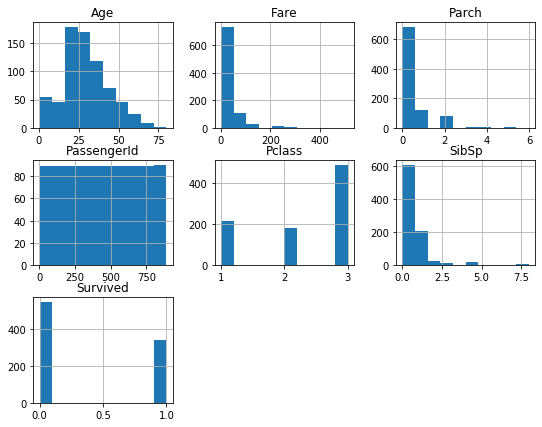

In [51]:
train_df.hist(figsize=(9,7))

In [52]:
train_df.isnull().sum()

Age            177
Cabin          687
Embarked         2
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
Title            0
dtype: int64

In [53]:
test_df.isnull().sum()

Age             86
Cabin          327
Embarked         0
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Title            0
dtype: int64

In [55]:
full_df['Embarked'].value_counts()
full_df['Embarked'].fillna("S",inplace=True)


In [57]:
Fare_median=full_df['Fare'].median()
full_df['Fare'].fillna(test_df['Fare'].median(),inplace=True,inplace=True)

In [82]:
train_df,test_df=extract_df()

In [60]:
full_df['Sex']=full_df['Sex'].map({'female':0,'male':1})

In [83]:
full_df['Title']

KeyError: 'Title'

In [70]:
def one_hot(df,feature_list):  #원핫인코딩 구현
    df= pd.get_dummies(df, columns=feature_list)
    return df

onehot_list=['Title','Pclass','Embarked']
full_df=one_hot(full_df,onehot_list)

In [71]:
full_df

,Age,Fare,Parch,Sex,SibSp,Survived,Title_Dr,Title_Jonkheer,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,1,1,0.0,0,0,0,0,1,0,0,0,0,1,0,0,1
1,38.0,71.2833,0,0,1,1.0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,26.0,7.9250,0,0,0,1.0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,35.0,53.1000,0,0,1,1.0,0,0,0,0,0,1,0,1,0,0,0,0,1
4,35.0,8.0500,0,1,0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,8.0500,0,1,0,NaN,0,0,0,0,1,0,0,0,0,1,0,0,1
1305,39.0,108.9000,0,0,0,NaN,0,0,0,0,0,0,1,1,0,0,1,0,0
1306,38.5,7.2500,0,1,0,NaN,0,0,0,0,1,0,0,0,0,1,0,0,1
1307,NaN,8.0500,0,1,0,NaN,0,0,0,0,1,0,0,0,0,1,0,0,1


In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
Age         714 non-null float64
Embarked    891 non-null object
Fare        891 non-null float64
Parch       891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
SibSp       891 non-null int64
Survived    891 non-null float64
Title       891 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 69.6+ KB


In [86]:
x_train_age=full_df[[ x for x in list(train_df) if not x in ['Survived']]]

In [92]:
for x in list(train_df):
    print(train_df['Survived'])

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64
0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64
0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64
0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64
0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64
0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64
0      0.0

In [88]:
x_predict_age=x_train_age.loc[x_train_age['Age'].isnull()]

In [89]:
x_train_age=x_train_age.loc[x_train_age['Age'].notnull()]

In [90]:
y_train_age=x_train_age.Age

In [98]:
#x_train_age.drop("Age",axis=1,inplace=True)
x_predict_age.drop("Age",axis=1,inplace=True)

In [ ]:
#MLP 기반 나이 예측 및 나이 결측값 대체

In [94]:
from sklearn import preprocessing
scaler2=preprocessing.StandardScaler().fit(x_train_age)

In [99]:
x_predict_age

,Fare,Parch,Sex,SibSp,Title_Dr,Title_Jonkheer,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
5,8.4583,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
17,13.0000,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
19,7.2250,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
26,7.2250,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0
28,7.8792,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,7.7208,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
1301,7.7500,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
1304,8.0500,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1307,8.0500,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [100]:
x_train_age=scaler2.transform(x_train_age)
x_predict_age=scaler2.transform(x_predict_age)

In [102]:
full_df[full_df['Age'].isnull()].index   # <- 결측값이 있는 index 번호만

Int64Index([   5,   17,   19,   26,   28,   29,   31,   32,   36,   42,
            ...
            1256, 1257, 1271, 1273, 1275, 1299, 1301, 1304, 1307, 1308],
           dtype='int64', length=263)

In [105]:
Age_None_list=full_df[full_df['Age'].isnull()].index.tolist()
#index.tolist()

In [106]:
from sklearn.neural_network import MLPRegressor
mlr=MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50,50))
mlr.fit(x_train_age, y_train_age)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [108]:
mlr.score(x_train_age,y_train_age)

0.5494940715349119

In [110]:
for a,b in zip(np.array(y_train_age),mlr.predict(x_train_age)):
    print(a, "|",b)

22.0 | 27.041907945729438
38.0 | 37.3350092548524
26.0 | 23.84071354451738
35.0 | 38.22175856590852
35.0 | 28.44168172885072
54.0 | 43.871208845576895
2.0 | 4.79023261746777
27.0 | 30.282254733867063
14.0 | 20.380586466158025
4.0 | 1.7803566382394003
58.0 | 30.8168372294439
20.0 | 28.44168172885072
39.0 | 37.37597306187676
14.0 | 23.840730678504322
55.0 | 35.75566053887543
2.0 | 6.461568289829112
31.0 | 33.88600101445064
35.0 | 31.519799662883866
34.0 | 31.535660288739738
15.0 | 23.165091937440206
28.0 | 43.88537501941657
8.0 | 4.742574900274317
38.0 | 39.00384302744842
19.0 | 20.57819282449947
40.0 | 48.81546329872223
66.0 | 31.53871040909663
28.0 | 40.92421321285136
42.0 | 39.049748164154856
21.0 | 28.44168172885072
18.0 | 21.184620416127725
14.0 | 13.682744686769093
40.0 | 33.89307156161157
27.0 | 33.43074893702816
3.0 | -0.7523770887779059
19.0 | 23.165083533943875
18.0 | 33.8861668923899
7.0 | 4.498162924129647
21.0 | 28.441936019623903
49.0 | 37.330251644769575
29.0 | 33.42522818

In [113]:
full_df['Age'][Age_None_list]=mlr.predict(x_predict_age).tolist()

C:\Users\ilike\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
full_df

,Age,Fare,Parch,Sex,SibSp,Survived,Title_Dr,Title_Jonkheer,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,7.2500,0,1,1,0.0,0,0,0,0,1,0,0,0,0,1,0,0,1
1,38.000000,71.2833,0,0,1,1.0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,26.000000,7.9250,0,0,0,1.0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,35.000000,53.1000,0,0,1,1.0,0,0,0,0,0,1,0,1,0,0,0,0,1
4,35.000000,8.0500,0,1,0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,4.747299,8.0500,0,1,0,NaN,0,0,0,0,1,0,0,0,0,1,0,0,1
1305,39.000000,108.9000,0,0,0,NaN,0,0,0,0,0,0,1,1,0,0,1,0,0
1306,38.500000,7.2500,0,1,0,NaN,0,0,0,0,1,0,0,0,0,1,0,0,1
1307,4.747299,8.0500,0,1,0,NaN,0,0,0,0,1,0,0,0,0,1,0,0,1


In [116]:
xtrain=full_df[full_df['Survived'].notnull()]

In [118]:
ytrain=full_df['Survived'][full_df['Survived'].notnull()]

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [119]:
xpredict=full_df[full_df['Survived'].isnull()]

In [120]:
xtrain.drop('Survived',axis=1,inplace=True)
xpredict.drop('Survived',axis=1,inplace=True)

C:\Users\ilike\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [121]:
scaler=preprocessing.StandardScaler().fit(xtrain)
xtrain=scaler.transform(xtrain)
xpredict=scaler.transform(xpredict)

In [136]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='lbfgs',alpha=1e-5,
             hidden_layer_sizes=(100,100,50,20))

In [137]:
clf.fit(xtrain,ytrain)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 50, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [138]:
clf.score(xtrain,ytrain)


0.9270482603815937

In [139]:
clf.predict(xtrain)

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0.

In [140]:
subcol=clf.predict(xpredict).astype(int)

In [142]:
SubCol1

891      892
892      893
893      894
894      895
895      896
        ... 
1304    1305
1305    1306
1306    1307
1307    1308
1308    1309
Name: PassengerId, Length: 418, dtype: int64

In [143]:
sm=pd.DataFrame({'PassengerId':SubCol1,'Survived':subcol})
sm.to_csv('titanic_sub using4layer.csv',index=False)